# 数据集构建

In [1]:
import re
import jiagu as jg
import numpy as np
import nltk

In [65]:
news_path = '娱乐新闻.txt'
articles = list()
with open(news_path,'r',encoding='utf-8') as f:
    for line in f.readlines():
        articles.append(line.strip())

In [66]:
articles[31]#示例文章展示

'台湾著名女子组合S.H.E.成员Selina（任家萱）与前夫张承中离婚5年，张承中最近传出与41岁的台湾视后尹馨恋情曝光，尹馨透过经纪人大方承认恋情，并表示是以结婚为目的的交往，Selina同时也大方送上祝福。近日，据台湾媒体报道，41岁的台湾视后尹馨承认自己与Selina的律师前夫张承中已经交往半年，并且两人是以结婚为前提进行交往。尹馨透过经理人承认恋情，她说：“谢谢大家关心，我们是通过朋友介绍认识，目前我们都各自忙于工作，也在彼此的慢慢认识对方，请大家给我们一点空间。”今年47岁的张承中，自从和Selina离婚以后，感情生活一直多姿多彩。2016年，张承中被拍到与主播洪黎恩当街嬉戏，同时在街上亲吻。而这次张承中终于承认已经拍拖，似乎比以前认真。据台媒报道，两人目前感情稳定，双方已经见了家长，相处和家人一样，两人还经常约会，尹馨弟弟也有一起，张承中更经常帮忙照顾尹馨的侄女。其实尹馨和Selina两人早就认识，2013年，尹馨上了Selina有份主持的综艺节目《康熙来了》的其中一期。尹馨和Selina都是在师大念书，尹馨有感而发的说如果当年能提早认识Selina，自己可能不会这么孤单。两人还在节目里互相调侃，Selina表示尹馨应该是属于女生讨厌的那种人，因为她又漂亮、又聪明、又身材好，集所有优点为一身。而这次两人恋情曝光，Selina也是特别透过经纪人为两人送上了祝福。今年41岁的尹馨是台湾女演员，凭借精湛的演技，跨界涉足电影、电视剧以及舞台剧等领域，她曾获得第49届金钟奖以及第51届金钟迷你奖的电视剧、电影最佳女主角。尹馨沉迷于戏剧创作，还曾经获得过迷你剧集最佳编剧奖。2010年5月，在S.H.E.小巨蛋演唱会上。张承中拿着话筒表白，公开与Selina的恋情。那年10月，Selina在上海拍爆破戏时，由于事故导致全身54%灼伤。Selina和张承中两人在2011年底结婚，婚后的生活，几乎一直是传媒争先报道的对象，导致不是艺人的张承中也经常上封面。张承中曾在采访中说：“她和我都无能为力，只能说环境就是这样，不会去怪她，不是她造成的，要同苦不能同甘也是蛮遗憾的，那感觉有点像我上辈子欠她的。所以，在她人生大关卡的时候我出现，然后我任务到了，有点像这样，感觉到任务结束了那个时间也到了。”离婚多年，张承中和朋友喝酒还是会被拍到，他也感到很无奈，他表示这件事情唯一带给这个

In [67]:
print('文章数量：{}'.format(len(articles)))# 文章数展示

文章数量：32


In [68]:
from string import digits,punctuation # digits 数字字符，punctuation 英文标点
# 中文标点
hanzi = '＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､\u3000、〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏﹑﹔·！？｡。'

rule = re.compile(u'[^a-zA-Z' # 英文字符
                  + digits # 数字字符
                  + punctuation #英文标点字符
                  + hanzi # 中文标点字符
                  + '\u4e00-\u9fa5]+' #汉字字符
                 )
articles_text = []
for article in articles:
    articles_text.append(re.sub(rule,'',article))

print("清洗后数据示例：",articles_text[6])

清洗后数据示例： 11月15日，汪峰前妻葛荟婕突然发博，吐槽汪峰为原始人，在搞繁殖，疑似对章子怡怀二胎的事心有芥蒂。汪峰的大女儿小苹果为他与葛荟婕所生，因此作为小苹果的亲妈，害怕女儿得到的父爱又减少一分，也算是可以理解。近日，章子怡在微博中晒出带亲生女儿醒醒旅游的照片，而此时，非亲生女儿小苹果也在社媒晒出自己煮面失败的视频。两相对比下，小苹果显得非常可怜，想必而这也是让葛荟婕自己大为恼火的另一原因。对于女儿小苹果的出国，葛荟婕当年得知消息后是非常生气的。因为汪峰当时并没有和她商量就私自做了决定，而才刚14岁的小苹果根本生活无法自理，我见犹怜。再加上章子怡的第二个孩子也即将出生，小苹果似乎确实受到了汪峰和章子怡的冷落。从先前晒出的家庭合照可知，小苹果与章子怡相处得还挺愉快的，而章子怡也曾在综艺中表态，小苹果第一次见到她就叫"妈妈"了，非常懂事。当年因为贪玩成性，汪峰选择和葛荟婕分道扬镳，自己带着女儿生活。后来，汪峰与章子怡重组了家庭，一家人生活地非常幸福。今年六月，葛荟婕发博袒露内心，称自己已经放过自己了，不再爱也不再想汪峰了。先前，葛荟婕曾在各种场合对汪峰冷嘲热讽，一度令汪峰非常苦恼。而她如今又再度开炮，可见她自己也只是说说罢了，并没有就此放过前夫。今年十月，葛荟婕在微博中深省，发现自己先前离开女儿的行为其实是自私的。毕竟母女情深，葛荟婕与小苹果私下里应该也是在联系的。而她在与汪峰分开后，始终没有一个身边人陪伴，可见葛荟婕对女儿始终有亏欠之情。看到葛荟婕再次对汪峰发起攻势，网友们也都在劝她，希望她和汪峰能够各自安好。说起来，小苹果和章子怡一起生活已经很多年了，两人就算没有血缘关系，也已经相处得如同一家人。而葛荟婕这样挑衅，会让女儿夹在中间，非常难以抉择。正如网友所言，汪峰和章子怡是合法夫妻，想生几个孩子是他们的权利。而汪峰自己向来是个女儿奴，想必就算章子怡的二胎还是女儿，他也能够照顾得好一家五口，让三个孩子都能享受到同样的爱。


In [69]:
# 简单分句
articles_sentences = []
for article in articles:
    article = re.split('(。|！|\!|？|\?)',article) # 简单分句，保留分割符 re分句
    last = ''
    if len(article) % 2 != 0:
        last = article[-1]
    article = [article[2*i]+article[2*i+1] for i in range(int(len(article) / 2))] # 将分隔符与句子拼接
    if last != '':
        article.append(last)
    
    articles_sentences.append(article)

In [70]:
print("分句示例：")
num=0
for i in range(len(articles_sentences)):
    for j in range(len(articles_sentences[i])):
        print("句子",str(num)+": "+articles_sentences[i][j])
        num+=1

分句示例：
句子 0: 与贾乃亮11月14日晚发布早已拟定好的离婚声明之后，李小璐11月15日凌晨透过社交平台发布两年多来的心路历程，认定之所以移情别恋并非只图个新鲜，并借用多年前在山村拍戏借宿在老人家中的故事暗喻内心缺乏安全感。
句子 1: 如今与贾乃亮分道扬镳，但李小璐却寓意深长地表示无论曾经在前一段婚姻里经历什么事情，都不会重提，暗示外界看起来的美好婚姻于她来说并不甜蜜。
句子 2: 而她的情感选择也只是一个普通女人的选择，希望获得理解。
句子 3: 李小璐的长文中还提及曾经的夜会门，称事件被曝光后身陷争议的痛苦，甚至想过从位于高层的家中一跃而下，而对女儿的牵挂留下了她。
句子 4: 其中，她还提及，被拍到夜会之后，曾有人给她打电话，暗示其可以支出费用私了，但她并没有理会，因而有了后来的舆论纷纷。
句子 5: 在李小璐的长文引来各种关注和争议之外，11月15日中午，李小璐当时“夜会风波”的拍摄者卓伟在朋友圈里直接予以回击。
句子 6: 卓伟表示，其本人与之前的团队成员从未给李小璐打过电话，而他前一次致电李小璐还是2001年时，因为所在媒体需要的电影采访。
句子 7: 卓伟还信誓旦旦地表示，自己与成员从未收过李小璐的人物钱物，甚至是一盒茶叶。
句子 8: 此外，卓伟发布的内容中还附带了两张其与媒体记者在11月15日上午的对话记录，他坚定地表示从未收过李小璐的钱物，此外还表示自己从未给李小璐致电，相反是其本人四处托人找他，央求不要将内容曝光。
句子 9: 卓伟还表示，李小璐还被人骗取了钱财，但他分文未收。
句子 10: 在恢复单身后，李小璐的长文原本希望释疑两年多的情感变化，然而除开她认为前段婚姻的诸多问题酝酿出后来的变化引来争议，她和卓伟你来我往又成了“罗生门”。
句子 11: 11月14日22点，贾乃亮与李小璐工作室发布联合声明，承认两人早已离婚的事实。
句子 12: 据悉，李小璐与贾乃亮是2012年奉女成婚，女儿甜馨儿后靠真人秀节目走红。
句子 13: 一家三口曾是羡煞旁人的模范家庭。
句子 14: 不过，两人结婚时，李小璐早已是家喻户晓的少年女影后，儿而贾乃亮顶着“奶油小生”的名头，事业毫无起色。
句子 15: 2018年初，卓伟爆料打破了这个家庭的平静，李小璐声名狼藉，贾乃亮也被人们同情的眼光压弯了要腰。
句子 16: 再出现在大众视野时，贾乃亮从一个阳

句子 723: 就算贾乃亮以后接送甜馨上下学，与家人一同外出，他也难逃李小璐的影子，因为舆论并不会因他们离婚而将他们两人的名字分开。
句子 724: 离婚只是过去，贾乃亮的未来更值得关注，他不会因为离婚而得到舆论上的安宁，更不会因为不愿曝光私生活，而就能得到尊重，毕竟身处娱乐圈身不由己！
句子 725: 未来的路很艰辛，贾乃亮需要做的并不是松懈，而是更加防备。
句子 726: 但愿他不再被伤害，不管是舆论上的伤害还是情感上的伤害，如此善良的他都不该承受这些。
句子 727: 台湾著名女子组合S.H.E.成员Selina（任家萱）与前夫张承中离婚5年，张承中最近传出与41岁的台湾视后尹馨恋情曝光，尹馨透过经纪人大方承认恋情，并表示是以结婚为目的的交往，Selina同时也大方送上祝福。
句子 728: 近日，据台湾媒体报道，41岁的台湾视后尹馨承认自己与Selina的律师前夫张承中已经交往半年，并且两人是以结婚为前提进行交往。
句子 729: 尹馨透过经理人承认恋情，她说：“谢谢大家关心，我们是通过朋友介绍认识，目前我们都各自忙于工作，也在彼此的慢慢认识对方，请大家给我们一点空间。
句子 730: ”今年47岁的张承中，自从和Selina离婚以后，感情生活一直多姿多彩。
句子 731: 2016年，张承中被拍到与主播洪黎恩当街嬉戏，同时在街上亲吻。
句子 732: 而这次张承中终于承认已经拍拖，似乎比以前认真。
句子 733: 据台媒报道，两人目前感情稳定，双方已经见了家长，相处和家人一样，两人还经常约会，尹馨弟弟也有一起，张承中更经常帮忙照顾尹馨的侄女。
句子 734: 其实尹馨和Selina两人早就认识，2013年，尹馨上了Selina有份主持的综艺节目《康熙来了》的其中一期。
句子 735: 尹馨和Selina都是在师大念书，尹馨有感而发的说如果当年能提早认识Selina，自己可能不会这么孤单。
句子 736: 两人还在节目里互相调侃，Selina表示尹馨应该是属于女生讨厌的那种人，因为她又漂亮、又聪明、又身材好，集所有优点为一身。
句子 737: 而这次两人恋情曝光，Selina也是特别透过经纪人为两人送上了祝福。
句子 738: 今年41岁的尹馨是台湾女演员，凭借精湛的演技，跨界涉足电影、电视剧以及舞台剧等领域，她曾获得第49届金钟奖以及第51届金钟迷你奖的电

In [71]:
#分词
segment_model_path = 'cnc.model' # 分词模型路径
jg.load_model(segment_model_path) 

articles_words = list()
for article in articles_sentences:
    words = []
    for text in article:
        words.append(jg.cut(text)) # 分词
    articles_words.append(words)

In [72]:
print("分词示例：")
num=0
for i,article in enumerate(articles_words): 
    for words in article:
        print("句子",str(num)+": "+'{}'.format('/'.join(words)))
        num+=1

分词示例：
句子 0: 与/贾乃亮/11/月/14/日/晚/发布/早已/拟定/好/的/离婚/声明/之后/，/李小璐/11/月/15/日/凌晨/透过/社交/平台/发布/两/年/多/来/的/心路/历程/，/认定/之所以/移情/别/恋/并非/只/图/个/新鲜/，/并/借用/多/年/前/在/山村/拍戏/借宿/在/老人家/中/的/故事/暗喻/内心/缺乏/安全感/。
句子 1: 如今/与/贾乃亮/分道扬镳/，/但/李小璐/却/寓意/深长/地/表示/无论/曾经/在/前/一/段/婚姻/里/经历/什么/事情/，/都/不会/重提/，/暗示/外界/看起来/的/美好/婚姻/于/她/来说/并不/甜蜜/。
句子 2: 而/她/的/情感/选择/也/只是/一个/普通/女人/的/选择/，/希望/获得/理解/。
句子 3: 李小璐/的/长/文中/还/提及/曾经/的/夜会门/，/称/事件/被/曝光/后身/陷/争议/的/痛苦/，/甚至/想/过从/位于/高层/的/家中/一跃/而/下/，/而/对/女儿/的/牵挂/留下/了/她/。
句子 4: 其中/，/她/还/提及/，/被/拍/到/夜会/之后/，/曾/有人/给/她/打电话/，/暗示/其/可以/支出/费用/私/了/，/但/她/并/没有/理会/，/因而/有/了/后来/的/舆论纷纷/。
句子 5: 在/李小璐/的/长文/引来/各种/关注/和/争议/之外/，/11/月/15/日/中午/，/李小璐/当时/“/夜会/风波/”/的/拍摄/者/卓伟/在/朋友/圈里/直接/予以/回击/。
句子 6: 卓伟/表示/，/其/本人/与/之前/的/团队/成员/从未/给/李小璐/打/过/电话/，/而/他/前/一/次/致电/李小璐/还是/2001/年时/，/因为/所在/媒体/需要/的/电影/采访/。
句子 7: 卓伟/还/信/誓旦旦/地/表示/，/自己/与/成员/从未/收/过/李小璐/的/人物/钱物/，/甚至/是/一/盒/茶叶/。
句子 8: 此外/，/卓伟/发布/的/内容/中/还/附带/了/两/张/其/与/媒体/记者/在/11/月/15/日/上午/的/对话/记录/，/他/坚定/地/表示/从未/收/过/李小璐/的/钱物/，/此外/还/表示/自己/从未/给/李小璐/致电/，/相反/是/其/本人/四处/托人/找/他/，/央求/不要/将/内容/曝光/。
句子 9: 卓伟/还/表示/，/李小璐/还

句子 668: 据/韩/媒/报道/，/韩/警方/确认/《/Produce/101/》/全/系列/造假/，/除/安俊英/PD/等/人/承认/了/的/第三/季/和/第四季之外/，/《/Produce/》/整/一系列/都/和/观众/投票/结果/不同/，/目前/警方/已经/确认/制作/团队/介入/其中/，/并/进行/了/造/假/。
句子 669: 据了解/，/因/涉嫌/操纵/得票/被/拘留/的/安俊英/等/两/人/于/本月/(/11/月/)/14/日/被/移交/检察/机关/。
句子 670: 据/韩国/媒体/报道/，/Mnet/PD/安俊英/承认/了/《/PRODUCE/ /101/》/第1/季/和/第/2/季/部分/排/名造/假/。
句子 671: 此前/安俊英/虽然/承认/了/《/PRODUCE/48/》/、/《/PRODUCE/ /X/101/》/的/造假/嫌疑/，/但是/强烈/否认/《/Produce/ /101/》/第1/季/和/第/2/季/的/造假/嫌疑/，/但是/在/今日/下午/移交/检/方后/，/也/承认/了/一部分/《/PRODUCE/ /101/》/第1/季/和/第/2/季/的/排/名造/假/嫌疑/。
句子 672: 至此/不仅/是/活动/中断/的/IZ/*/ONE/和/X/1/，/就/连/已经/解散/的/I/./O/./I/和/WANNAONE/也/卷入/了/造/假/风波/。
句子 673: 除了/《/PRODUCE/ /101/》/之外/，/警方/还/在/继续/对/Mnet/的/另外/一个/选秀/节目/《/偶像/学校/》/进行/调查/。
句子 674: 昨晚/，/李小璐/和/贾乃亮/双双/发表/声明/，/承认/两/人/早已/离婚/，/只是/因为/估计/孩子/才/没有/马上/对外/官/宣/。
句子 675: 发布/了/离婚/声明/之后/，/李小璐/工作室/又/回应/此前/被/曝光/的/视频/，/表示/是/有/不法分子/采取/非法/手段/获得/了/视频/，/所以/李小璐/在/11/月/4/日/在/律师/陪同/下到/派出所/报案/。
句子 676: 稍/晚/，/11/月/15/日/凌晨/两/点/多/，/李小璐/再次/更新/了/个人/社交/平台/，/并/发表/了/长文/，/透露/自己/经历/过/偷/拍/、/网/暴/等/舆论/，/压力/之/大/，/令/她/曾/

In [73]:
articles_pos=[]
for article in articles_words: 
    pos_list=[]
    for words in article:
        pos = jg.pos(words) # 词性标注 pos表示标注
        pos_list.append(pos)
    articles_pos.append(pos_list)

In [74]:
print('PoS示例:')
num=0
for article,article_pos in zip(articles_words,articles_pos): 
    for words,pos in zip(article,article_pos):
        print("PoS",str(num)+": "+' '.join(['{}/{}'.format(w,p) for w,p in zip(words,pos)]))
        num+=1

PoS示例:
PoS 0: 与/c 贾乃亮/ni 11/m 月/nt 14/m 日/nt 晚/a 发布/v 早已/d 拟定/v 好/a 的/u 离婚/v 声明/v 之后/nt ，/w 李小璐/nh 11/m 月/nt 15/m 日/nt 凌晨/nt 透过/v 社交/v 平台/n 发布/v 两/m 年/nt 多/m 来/u 的/u 心路/n 历程/n ，/w 认定/v 之所以/c 移情/v 别/d 恋/v 并非/d 只/d 图/v 个/q 新鲜/a ，/w 并/c 借用/v 多/m 年/nt 前/nd 在/p 山村/n 拍戏/v 借宿/v 在/p 老人家/n 中/nd 的/u 故事/n 暗喻/n 内心/n 缺乏/v 安全感/n 。/w
PoS 1: 如今/nt 与/c 贾乃亮/nh 分道扬镳/i ，/w 但/c 李小璐/nh 却/d 寓意/n 深长/a 地/u 表示/v 无论/c 曾经/d 在/p 前/nd 一/m 段/q 婚姻/n 里/nd 经历/v 什么/r 事情/n ，/w 都/d 不会/vu 重提/v ，/w 暗示/v 外界/n 看起来/v 的/u 美好/a 婚姻/n 于/p 她/r 来说/v 并不/d 甜蜜/a 。/w
PoS 2: 而/c 她/r 的/u 情感/n 选择/v 也/d 只是/d 一个/mq 普通/a 女人/n 的/u 选择/v ，/w 希望/v 获得/v 理解/v 。/w
PoS 3: 李小璐/nh 的/u 长/a 文中/nl 还/d 提及/v 曾经/d 的/u 夜会门/n ，/w 称/v 事件/n 被/p 曝光/v 后身/n 陷/v 争议/v 的/u 痛苦/a ，/w 甚至/d 想/v 过从/v 位于/v 高层/n 的/u 家中/nl 一跃/v 而/c 下/nd ，/w 而/c 对/p 女儿/n 的/u 牵挂/v 留下/v 了/u 她/r 。/w
PoS 4: 其中/nd ，/w 她/r 还/d 提及/v ，/w 被/p 拍/v 到/v 夜会/ns 之后/nt ，/w 曾/d 有人/r 给/p 她/r 打电话/v ，/w 暗示/v 其/r 可以/vu 支出/v 费用/n 私/n 了/u ，/w 但/c 她/r 并/c 没有/d 理会/v ，/w 因而/c 有/v 了/u 后来/nt 的/u 舆论纷纷/n 。/w
PoS 5: 在/p 李小璐

In [113]:
# 生成文本标注
pattern = re.compile(r'([\u4e00-\u9fa5＂ ＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､\u3000、〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏﹑﹔·！？｡。])') 

labeled_data = []#
for article,article_pos in zip(articles_words,articles_pos): 
    ts = list()
    ps = list()
    for words,pos in zip(article,article_pos):
        tl=[]
        pl=[]
        for w,p in zip(words,pos):
            if len(w)!=0:
                # 分token
                tokens_han=pattern.findall(w)
                tokens=[]
                feihan_str=''
                for i in range(len(w)):
                    if w[i] in tokens_han:
                        if feihan_str!='':
                            tokens.append(feihan_str)
                        tokens.append(w[i])
                    else:
                        feihan_str+=w[i]

                if feihan_str!='':
                    tokens.append(feihan_str)  

                # 只有一个token，标注S
                if len(tokens)==1:
                    tl.append(tokens[0])
                    pl.append("S-"+p)
                else:
                    # 大于一个token，标注BIII...
                    first=0
                    for token in tokens:
                        tl.append(token)
                        if first==0:
                            pl.append("B-"+p)
                            first+=1
                        else:
                            pl.append("I-"+p)
        ts.append(tl)
        ps.append(pl)
                       
    labeled_data.append((ts,ps))

In [114]:
print('标注数据示例：')
num=0
for i in range(len(labeled_data)): 
    words=labeled_data[i][0]
    pos=labeled_data[i][1]
    for w,p in zip(words,pos):
        print("标注",str(num)+": "+' '.join(w)+"\t"+' '.join(p))
        num+=1

标注数据示例：
标注 0: 与 贾 乃 亮 11 月 14 日 晚 发 布 早 已 拟 定 好 的 离 婚 声 明 之 后 ， 李 小 璐 11 月 15 日 凌 晨 透 过 社 交 平 台 发 布 两 年 多 来 的 心 路 历 程 ， 认 定 之 所 以 移 情 别 恋 并 非 只 图 个 新 鲜 ， 并 借 用 多 年 前 在 山 村 拍 戏 借 宿 在 老 人 家 中 的 故 事 暗 喻 内 心 缺 乏 安 全 感 。	S-c B-ni I-ni I-ni S-m S-nt S-m S-nt S-a B-v I-v B-d I-d B-v I-v S-a S-u B-v I-v B-v I-v B-nt I-nt S-w B-nh I-nh I-nh S-m S-nt S-m S-nt B-nt I-nt B-v I-v B-v I-v B-n I-n B-v I-v S-m S-nt S-m S-u S-u B-n I-n B-n I-n S-w B-v I-v B-c I-c I-c B-v I-v S-d S-v B-d I-d S-d S-v S-q B-a I-a S-w S-c B-v I-v S-m S-nt S-nd S-p B-n I-n B-v I-v B-v I-v S-p B-n I-n I-n S-nd S-u B-n I-n B-n I-n B-n I-n B-v I-v B-n I-n I-n S-w
标注 1: 如 今 与 贾 乃 亮 分 道 扬 镳 ， 但 李 小 璐 却 寓 意 深 长 地 表 示 无 论 曾 经 在 前 一 段 婚 姻 里 经 历 什 么 事 情 ， 都 不 会 重 提 ， 暗 示 外 界 看 起 来 的 美 好 婚 姻 于 她 来 说 并 不 甜 蜜 。	B-nt I-nt S-c B-nh I-nh I-nh B-i I-i I-i I-i S-w S-c B-nh I-nh I-nh S-d B-n I-n B-a I-a S-u B-v I-v B-c I-c B-d I-d S-p S-nd S-m S-q B-n I-n S-nd B-v I-v B-r I-r B-n I-n S-w S-d B-vu I-vu B-v I-v S-w B-v I-v B-n I-n B-v I-v I-v 

In [116]:
#保存标注数据
filename = 'data_2017213152.txt'
with open(filename, 'w') as file_object:
    for i in range(len(labeled_data)): 
        words=labeled_data[i][0]
        pos=labeled_data[i][1]
        for w,p in zip(words,pos):
             file_object.write(' '.join(w)+"\t"+' '.join(p)+"\n")
print("完成！")

完成！


# 分词和POS联合训练模型------BiLSTM-CRF

In [15]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim
import time
import os 

torch.manual_seed(1)

In [118]:
#读取数据
data=[]
my_news_path = 'data/data_2017213152.txt'
with open(my_news_path,'r',encoding='utf-8') as f:
    for line in f.readlines():
        line=line[:-1]
        sentence=line.split("\t")
        
        tokens=sentence[0].split(' ')
        pos=sentence[1].split(' ')
        data.append((tokens,pos))

In [119]:
bro_news_path = 'data/data.txt'
with open(bro_news_path,'r',encoding='utf-8') as f:
    for line in f.readlines():
        line=line[:-1]
        sentence=line.split("\t")
        tokens=sentence[0].split(' ')
        pos=sentence[1].split(' ')
        data.append((tokens,pos))

In [120]:
data[0]

(['与',
  '贾',
  '乃',
  '亮',
  '11',
  '月',
  '14',
  '日',
  '晚',
  '发',
  '布',
  '早',
  '已',
  '拟',
  '定',
  '好',
  '的',
  '离',
  '婚',
  '声',
  '明',
  '之',
  '后',
  '，',
  '李',
  '小',
  '璐',
  '11',
  '月',
  '15',
  '日',
  '凌',
  '晨',
  '透',
  '过',
  '社',
  '交',
  '平',
  '台',
  '发',
  '布',
  '两',
  '年',
  '多',
  '来',
  '的',
  '心',
  '路',
  '历',
  '程',
  '，',
  '认',
  '定',
  '之',
  '所',
  '以',
  '移',
  '情',
  '别',
  '恋',
  '并',
  '非',
  '只',
  '图',
  '个',
  '新',
  '鲜',
  '，',
  '并',
  '借',
  '用',
  '多',
  '年',
  '前',
  '在',
  '山',
  '村',
  '拍',
  '戏',
  '借',
  '宿',
  '在',
  '老',
  '人',
  '家',
  '中',
  '的',
  '故',
  '事',
  '暗',
  '喻',
  '内',
  '心',
  '缺',
  '乏',
  '安',
  '全',
  '感',
  '。'],
 ['S-c',
  'B-ni',
  'I-ni',
  'I-ni',
  'S-m',
  'S-nt',
  'S-m',
  'S-nt',
  'S-a',
  'B-v',
  'I-v',
  'B-d',
  'I-d',
  'B-v',
  'I-v',
  'S-a',
  'S-u',
  'B-v',
  'I-v',
  'B-v',
  'I-v',
  'B-nt',
  'I-nt',
  'S-w',
  'B-nh',
  'I-nh',
  'I-nh',
  'S-m',
  'S-nt',
  'S-m',
  'S-nt',
  'B-nt',
 

In [124]:
for i in range(len(data)):
    if len(data[i][0])!=len(data[i][1]):
        data.pop(i) 

In [126]:
# 构造词表，标签字典
vocab = set()
labels = set()
for i in range(len(data)):
    for j in range(len(data[i][0])):
        vocab.add(data[i][0][j])
    for k in range(len(data[i][1])):   
        labels.add(data[i][1][k])
print('vocab size：{}'.format(len(vocab)))
print('label size: {}'.format(len(labels)))

vocab size：6163
label size: 90


In [127]:
def argmax(vec):
    # 返回序列中最大值的序号
    _, idx = torch.max(vec, 1)
    return idx.item()


def prepare_sequence(seq, to_ix):
    # 将文本序列转换为id序列
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


# Compute log sum exp in a numerically stable way for the forward algorithm
def log_sum_exp(vec):
    max_score = vec[0, argmax(vec)]
    max_score_broadcast = max_score.view(1, -1).expand(1, vec.size()[1])
    return max_score + torch.log(torch.sum(torch.exp(vec - max_score_broadcast)))

In [128]:
# 构建模型

# BiLSTM_CRF
class BiLSTM_CRF(nn.Module):

    def __init__(self, vocab_size, tag_to_ix, embedding_dim, hidden_dim):
        super(BiLSTM_CRF, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.tag_to_ix = tag_to_ix
        self.tagset_size = len(tag_to_ix)

        self.word_embeds = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2,
                            num_layers=1, bidirectional=True)

        # Maps the output of the LSTM into tag space.
        self.hidden2tag = nn.Linear(hidden_dim, self.tagset_size)

        # Matrix of transition parameters.  Entry i,j is the score of
        # transitioning *to* i *from* j.
        self.transitions = nn.Parameter(
            torch.randn(self.tagset_size, self.tagset_size))

        # These two statements enforce the constraint that we never transfer
        # to the start tag and we never transfer from the stop tag
        self.transitions.data[tag_to_ix[START_TAG], :] = -10000
        self.transitions.data[:, tag_to_ix[STOP_TAG]] = -10000

        self.hidden = self.init_hidden()

    def init_hidden(self):
        return (torch.randn(2, 1, self.hidden_dim // 2),
                torch.randn(2, 1, self.hidden_dim // 2))

    def _forward_alg(self, feats):
        # Do the forward algorithm to compute the partition function
        init_alphas = torch.full((1, self.tagset_size), -10000.)
        # START_TAG has all of the score.
        init_alphas[0][self.tag_to_ix[START_TAG]] = 0.

        # Wrap in a variable so that we will get automatic backprop
        forward_var = init_alphas

        # Iterate through the sentence
        for feat in feats:
            alphas_t = []  # The forward tensors at this timestep
            for next_tag in range(self.tagset_size):
                # broadcast the emission score: it is the same regardless of
                # the previous tag
                emit_score = feat[next_tag].view(
                    1, -1).expand(1, self.tagset_size)
                # the ith entry of trans_score is the score of transitioning to
                # next_tag from i
                trans_score = self.transitions[next_tag].view(1, -1)
                # The ith entry of next_tag_var is the value for the
                # edge (i -> next_tag) before we do log-sum-exp
                next_tag_var = forward_var + trans_score + emit_score
                # The forward variable for this tag is log-sum-exp of all the
                # scores.
                alphas_t.append(log_sum_exp(next_tag_var).view(1))
            forward_var = torch.cat(alphas_t).view(1, -1)
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        alpha = log_sum_exp(terminal_var)
        return alpha

    def _get_lstm_features(self, sentence):
        self.hidden = self.init_hidden()
        embeds = self.word_embeds(sentence).view(len(sentence), 1, -1)
        lstm_out, self.hidden = self.lstm(embeds, self.hidden)
        lstm_out = lstm_out.view(len(sentence), self.hidden_dim)
        lstm_feats = self.hidden2tag(lstm_out)
        return lstm_feats

    def _score_sentence(self, feats, tags):
        # Gives the score of a provided tag sequence
        score = torch.zeros(1)
        tags = torch.cat([torch.tensor([self.tag_to_ix[START_TAG]], dtype=torch.long), tags])
        for i, feat in enumerate(feats):
            score = score + \
                self.transitions[tags[i + 1], tags[i]] + feat[tags[i + 1]]
        score = score + self.transitions[self.tag_to_ix[STOP_TAG], tags[-1]]
        return score
    
    # CRF 维特比算法
    def _viterbi_decode(self, feats):
        backpointers = []

        # Initialize the viterbi variables in log space
        init_vvars = torch.full((1, self.tagset_size), -10000.)
        init_vvars[0][self.tag_to_ix[START_TAG]] = 0

        # forward_var at step i holds the viterbi variables for step i-1
        forward_var = init_vvars
        for feat in feats:
            bptrs_t = []  # holds the backpointers for this step
            viterbivars_t = []  # holds the viterbi variables for this step

            for next_tag in range(self.tagset_size):
                # next_tag_var[i] holds the viterbi variable for tag i at the
                # previous step, plus the score of transitioning
                # from tag i to next_tag.
                # We don't include the emission scores here because the max
                # does not depend on them (we add them in below)
                next_tag_var = forward_var + self.transitions[next_tag]
                best_tag_id = argmax(next_tag_var)
                bptrs_t.append(best_tag_id)
                viterbivars_t.append(next_tag_var[0][best_tag_id].view(1))
            # Now add in the emission scores, and assign forward_var to the set
            # of viterbi variables we just computed
            forward_var = (torch.cat(viterbivars_t) + feat).view(1, -1)
            backpointers.append(bptrs_t)

        # Transition to STOP_TAG
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        best_tag_id = argmax(terminal_var)
        path_score = terminal_var[0][best_tag_id]

        # Follow the back pointers to decode the best path.
        best_path = [best_tag_id]
        for bptrs_t in reversed(backpointers):
            best_tag_id = bptrs_t[best_tag_id]
            best_path.append(best_tag_id)
        # Pop off the start tag (we dont want to return that to the caller)
        start = best_path.pop()
        assert start == self.tag_to_ix[START_TAG]  # Sanity check
        best_path.reverse()
        return path_score, best_path

    def neg_log_likelihood(self, sentence, tags):
        feats = self._get_lstm_features(sentence)
        forward_score = self._forward_alg(feats)
        gold_score = self._score_sentence(feats, tags)
        return forward_score - gold_score

    def forward(self, sentence):  # dont confuse this with _forward_alg above.
        # Get the emission scores from the BiLSTM
        lstm_feats = self._get_lstm_features(sentence)

        # Find the best path, given the features.
        score, tag_seq = self._viterbi_decode(lstm_feats)
        return score, tag_seq

In [129]:
# 分割数据集
import random
data = data[:3000] # 因为使用CPU的关系，并且batch=1，应减少数据量
random.shuffle(data)
# train:dev:test = 6:2:2
# 分割数据集train_data，eval_data，test_data
train_data=data[0:1800]
eval_data=data[1800:2400]
test_data=data[2400:3000]

In [130]:
# 评价函数
def get_acc_metric(pred,target):
    corrent = 0
    total = 0
    for p,t in zip(pred,target):
        if p == t:
            corrent +=1
        total +=1
    return corrent,total

# 获取格式化时间
def get_s_time(seconds):
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    return "%02d:%02d:%02d" % (h, m, s)

In [131]:
# 训练模型
model_save_dir = './save'

START_TAG = "<START>"
STOP_TAG = "<STOP>"
EMBEDDING_DIM = 50
HIDDEN_DIM = 40

word_to_ix = {}
ix_to_word = {}
for i,v in enumerate(list(vocab)):
    word_to_ix[v] = i
    ix_to_word[i] = v

tag_to_ix = {}
ix_to_tag = {}
for i,tag in enumerate(list(labels)):
    tag_to_ix[tag] = i
    ix_to_tag[i] = tag

tag_to_ix[START_TAG] = len(tag_to_ix)
ix_to_tag[tag_to_ix[START_TAG]] = START_TAG
tag_to_ix[STOP_TAG] = len(tag_to_ix)
ix_to_tag[tag_to_ix[STOP_TAG]] = STOP_TAG

model = BiLSTM_CRF(len(word_to_ix), tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

# 检查模型输入输出是否运作正常
with torch.no_grad():
    precheck_sent = prepare_sequence(train_data[0][0], word_to_ix)
    precheck_tags = torch.tensor([tag_to_ix[t] for t in train_data[0][1]], dtype=torch.long)
    print(model(precheck_sent))


start = time.time()
loss_all = list()
loss_avg_all = list()
loss_avg = None
decay = 0.99
eval_epoch_loss = list()
eval_metric = list()
for epoch in range(3): 
    model.train()
    correct = 0
    total = 0
    for index, (sentence, tags) in enumerate(train_data):
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Get our inputs ready for the network, that is,
        # turn them into Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = torch.tensor([tag_to_ix[t] for t in tags], dtype=torch.long)

        # Step 3. Run our forward pass.
        loss = model.neg_log_likelihood(sentence_in, targets)
        loss_all.append(loss.item())
        
        # calculate avg loss , decay = 0.99
        if loss_avg is None:
            loss_avg = loss.item()
        else:
            loss_avg = loss_avg * decay + (1 - decay) * loss.item()
        loss_avg_all.append(loss_avg)

        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            _ , pred = model(sentence_in)
            c,all_ = get_acc_metric(pred,targets.data.tolist())
            correct += c
            total += all_
            
        if index % 100 == 0:
            print("epoch:{} - batch:{} : avg loss: {}, acc: {}%, total-time: {}".format(epoch,index,loss_avg,correct / total * 100.0,get_s_time(int(time.time()-start))))
            correct = 0
            total = 0
            
    # 验证模型
    model.eval()
    eval_loss_all = []
    correct = 0
    total = 0
    for index, (sentence, tags) in enumerate(eval_data):
        with torch.no_grad():
            sentence_in = prepare_sequence(sentence, word_to_ix)
            targets = torch.tensor([tag_to_ix[t] for t in tags], dtype=torch.long)
            eval_loss = model.neg_log_likelihood(sentence_in, targets)
            eval_loss_all.append(eval_loss.item())
            _ , pred = model(sentence_in)
            c,all_ = get_acc_metric(pred,targets.data.tolist())
            correct += c
            total += all_
    eval_epoch_loss.append(sum(eval_loss_all) / float(len(eval_data)))
    eval_metric.append(correct / total * 100.0)
    print()
    print('------ eval result ------')
    print('epoch {} : avg loss : {}, acc : {}%, total-time: {}'.format(epoch,sum(eval_loss_all) / float(len(eval_data)),correct / total * 100.0,get_s_time(int(time.time()-start))))
    print('-------------------------')
    print()
    
    # 保存模型
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)
    model_dir = os.path.join(model_save_dir, 'epoch_{}.model'.format(epoch))
    state = {
        'epoch': epoch,
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'loss_avg' : loss_avg,
        'eval_loss_avg': sum(eval_loss_all) / float(len(eval_data)),
        'eval_acc':correct / total * 100.0,
        'epoch_all_time': get_s_time(int(time.time()-start))
    }
    torch.save(state, model_dir)

(tensor(146.8577), [7, 62, 2, 31, 75, 29, 28, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 60, 73, 89])
epoch:0 - batch:0 : avg loss: 257.57330322265625, acc: 2.0%, total-time: 00:00:01
epoch:0 - batch:100 : avg loss: 198.0784234999983, acc: 16.30756231516688%, total-time: 00:02:40
epoch:0 - batch:200 : avg loss: 152.0452922415135, acc: 29.64022894521668%, total-time: 00:05:11
epoch:0 - batch:300 : avg loss: 128.68091106980006, acc: 31.910018746094565%, total-time: 00:07:39
epoch:0 - batch:400 : avg loss: 107.3647441264996, acc: 39.10698878343399%, total-time: 00:10:11
epoch:0 - batch:500 : avg loss: 98.32523302000067, acc: 42.674223341729636%, total-time: 00:12:37
epoch:0 - batch:600 : avg loss: 82.20286282185887, acc: 45.62529719448407%, total-time: 00:15:08
epoch:0 - batch:700 : avg loss: 74.9276191952518, acc: 48.78808094285078%, total-time: 00:17:32
epoch:0 - batch:80

In [132]:
# 测试模型

# 载入模型
model_dir = './save/epoch_2.model'
state = torch.load(model_dir)
model = BiLSTM_CRF(len(word_to_ix), tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)
model.load_state_dict(state['state_dict'])
model.eval()
correct = 0
total = 0
for index, (sentence, tags) in enumerate(test_data):
    with torch.no_grad():
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = torch.tensor([tag_to_ix[t] for t in tags], dtype=torch.long)
        _ , pred = model(sentence_in)
        c,all_ = get_acc_metric(pred,targets.data.tolist())
        correct += c
        total += all_
print()
print('------ test result ------')
print('test acc : {}%'.format(correct / total * 100.0))
print('-------------------------')
print()



------ test result ------
test acc : 68.53770768204012%
-------------------------



# 模型训练和模型结果可视化

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['figure.figsize'] =(16,9) # 设置图片分辨率 1600 * 900
plt.rcParams['figure.dpi'] = 300 # 分辨率

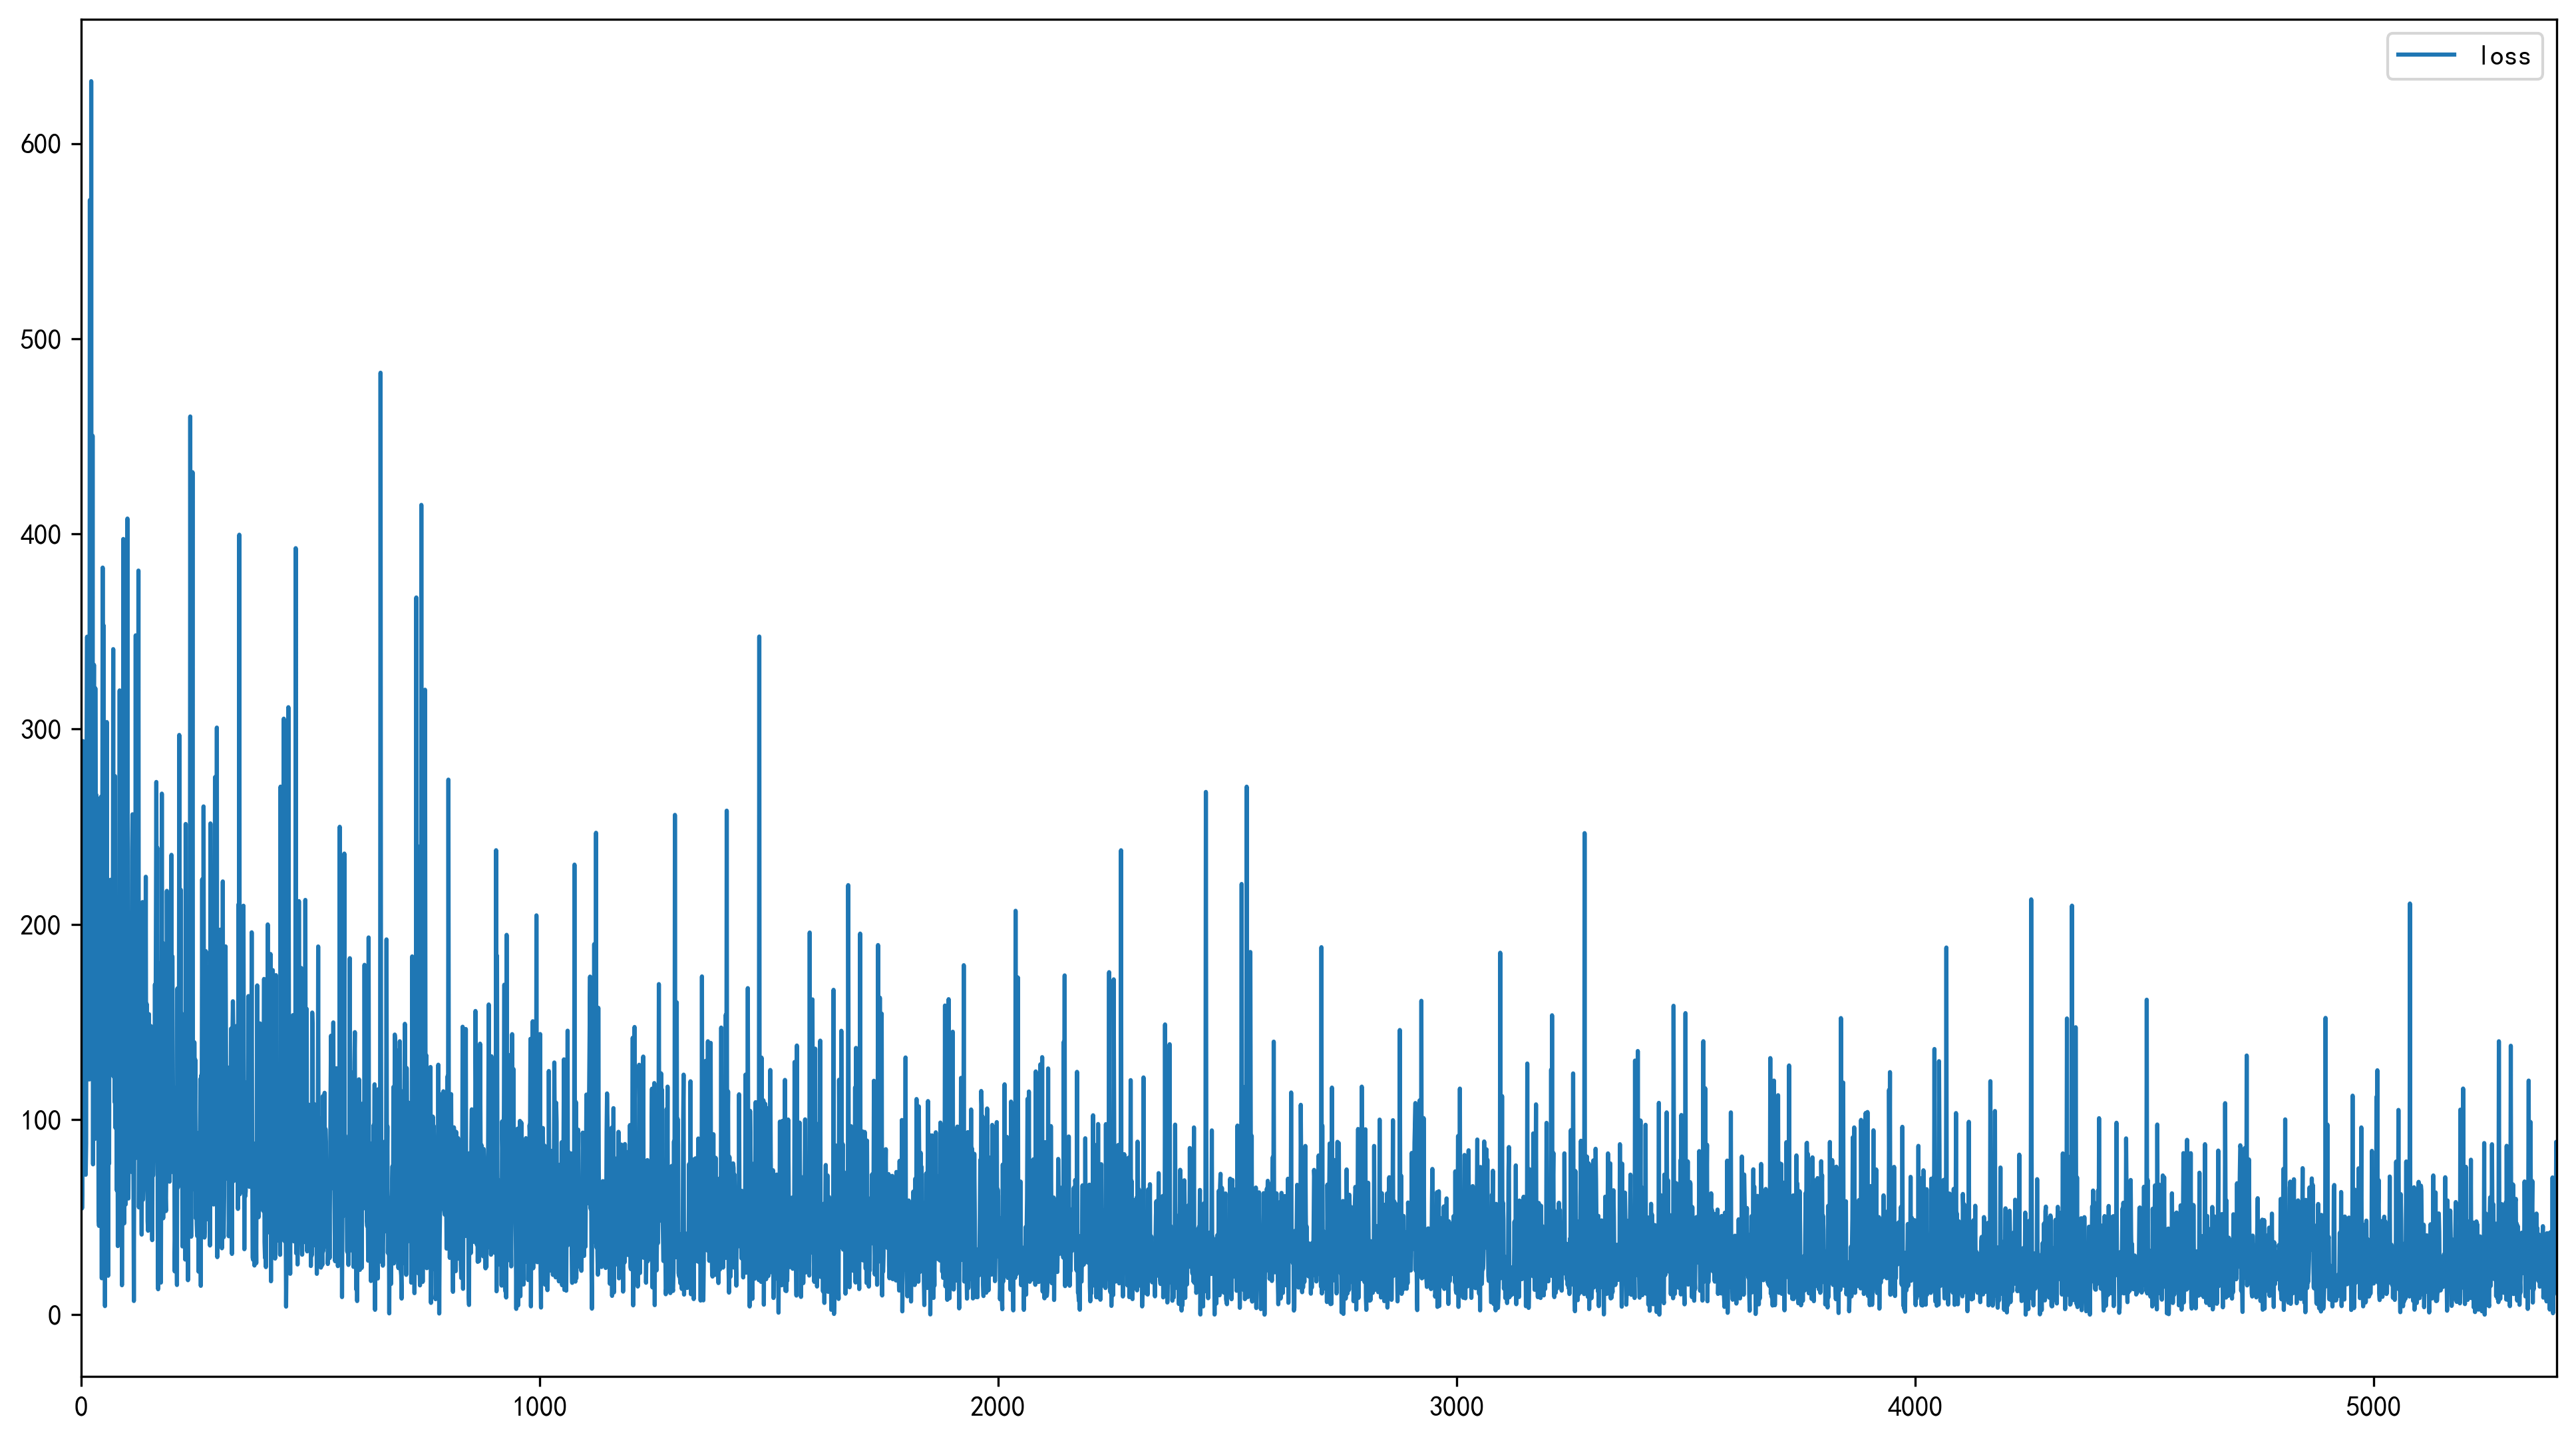

In [136]:
# 绘制batch-training loss折线图
loss_all_df = pd.DataFrame()
loss_all_df['loss'] = loss_all
loss_all_df.plot()

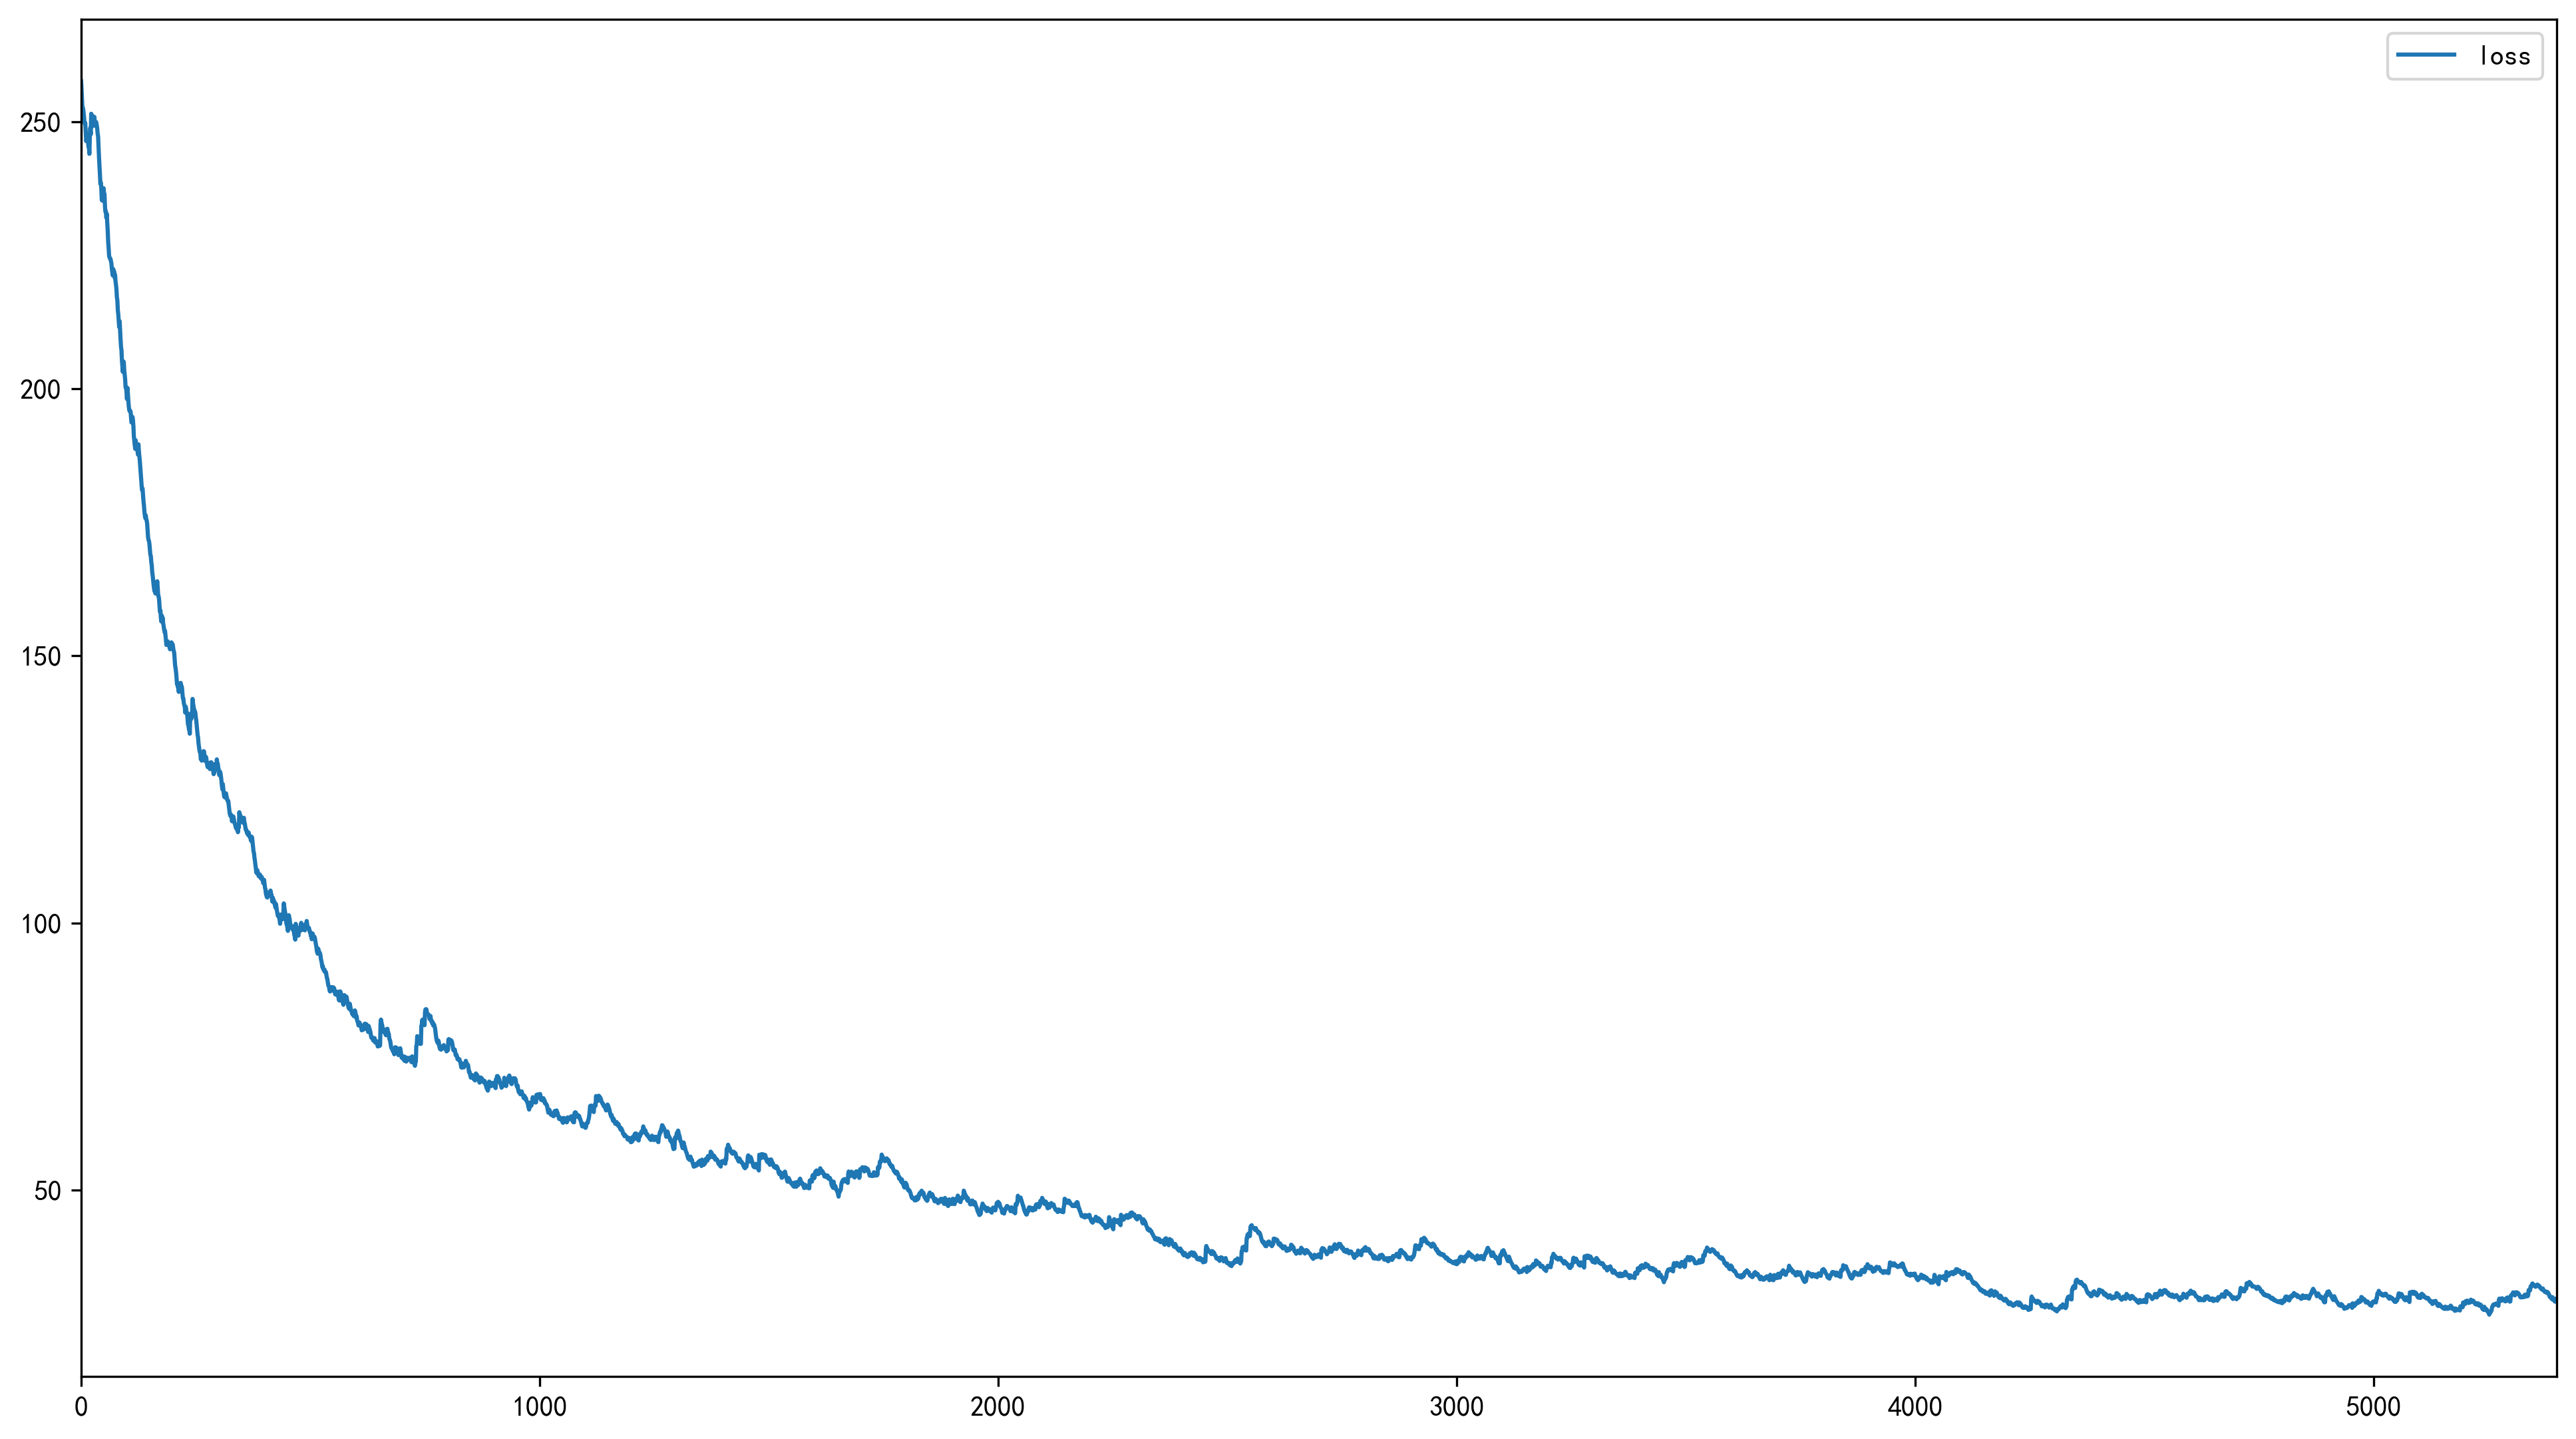

In [137]:
loss_avg_all_df = pd.DataFrame()
loss_avg_all_df['loss'] = loss_avg_all
loss_avg_all_df.plot()

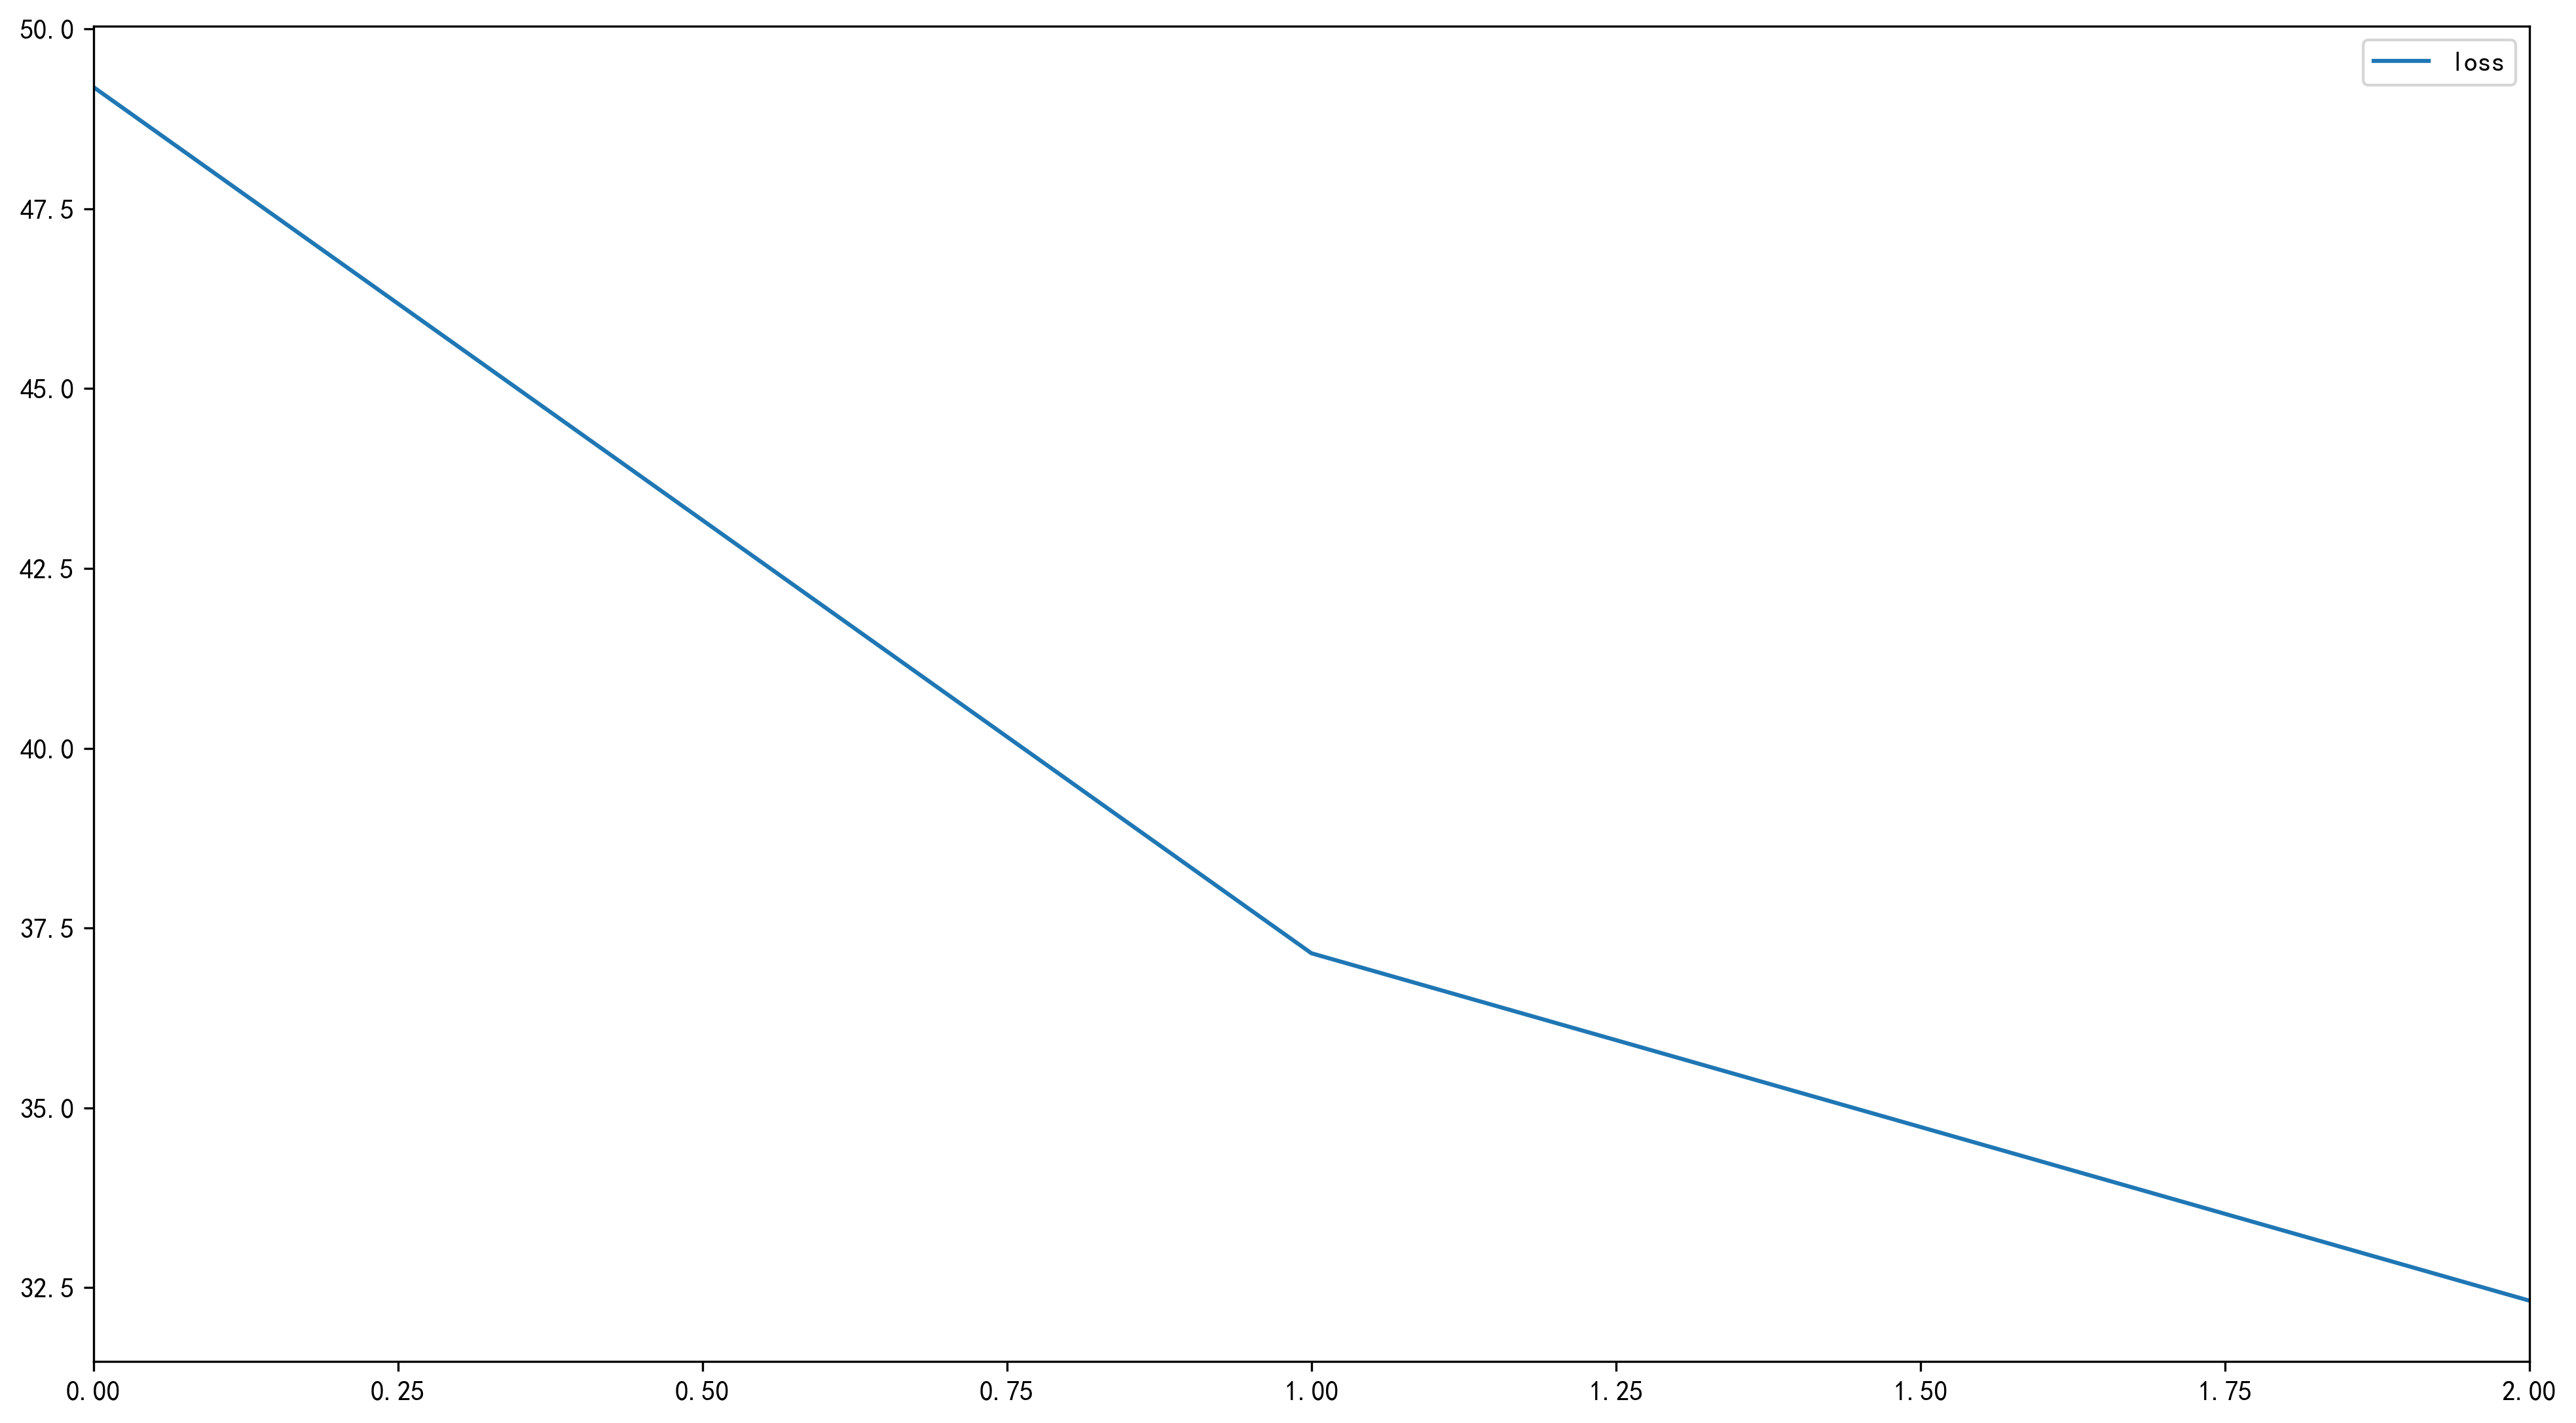

In [140]:
# 绘制epoch-eval loss折线图
eval_loss_all_df = pd.DataFrame()
eval_loss_all_df['loss'] = eval_epoch_loss
eval_loss_all_df.plot()

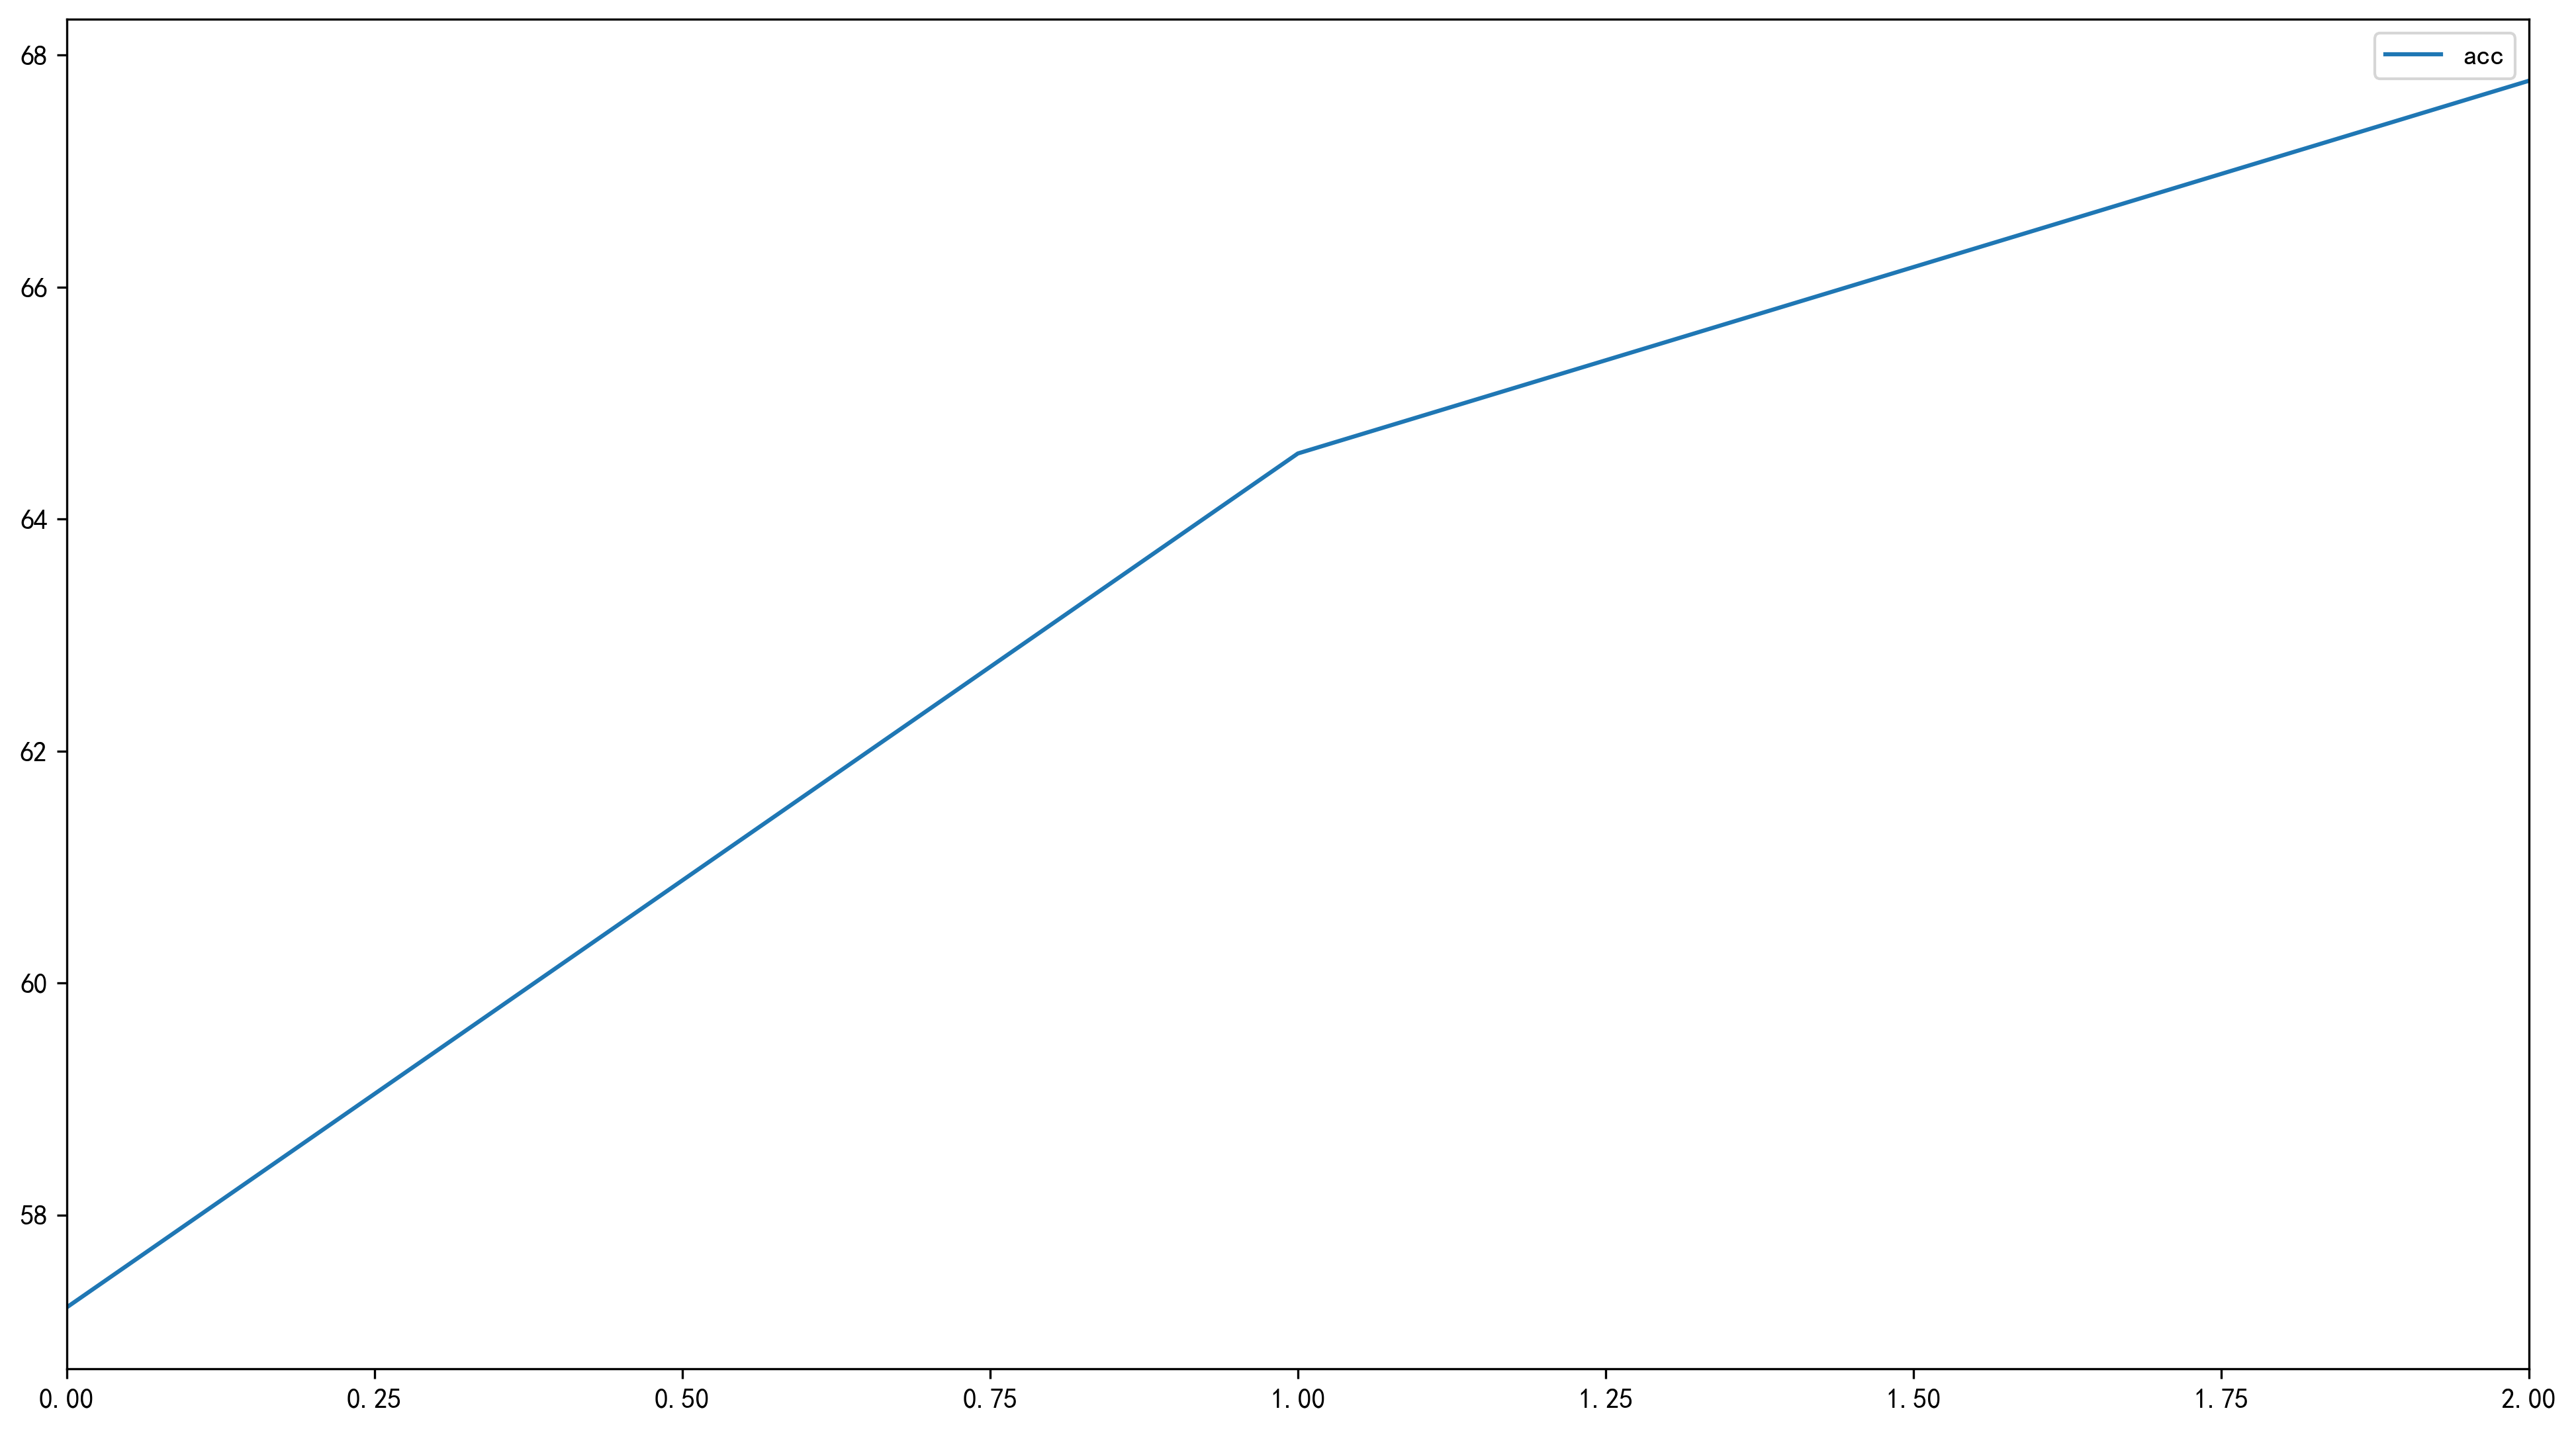

In [139]:
# 绘制epoch-accuracy折线图
eval_acc_df = pd.DataFrame()
eval_acc_df['acc'] = eval_metric
eval_acc_df.plot()

In [161]:
#绘制验证集每个epoch下评价指标和测试集的评价指标柱状图
test_acc=correct / total * 100.0
acc=[]
acc=eval_metric
acc.append(test_acc)
index=['eval_0','eval_1','eval_2','test']

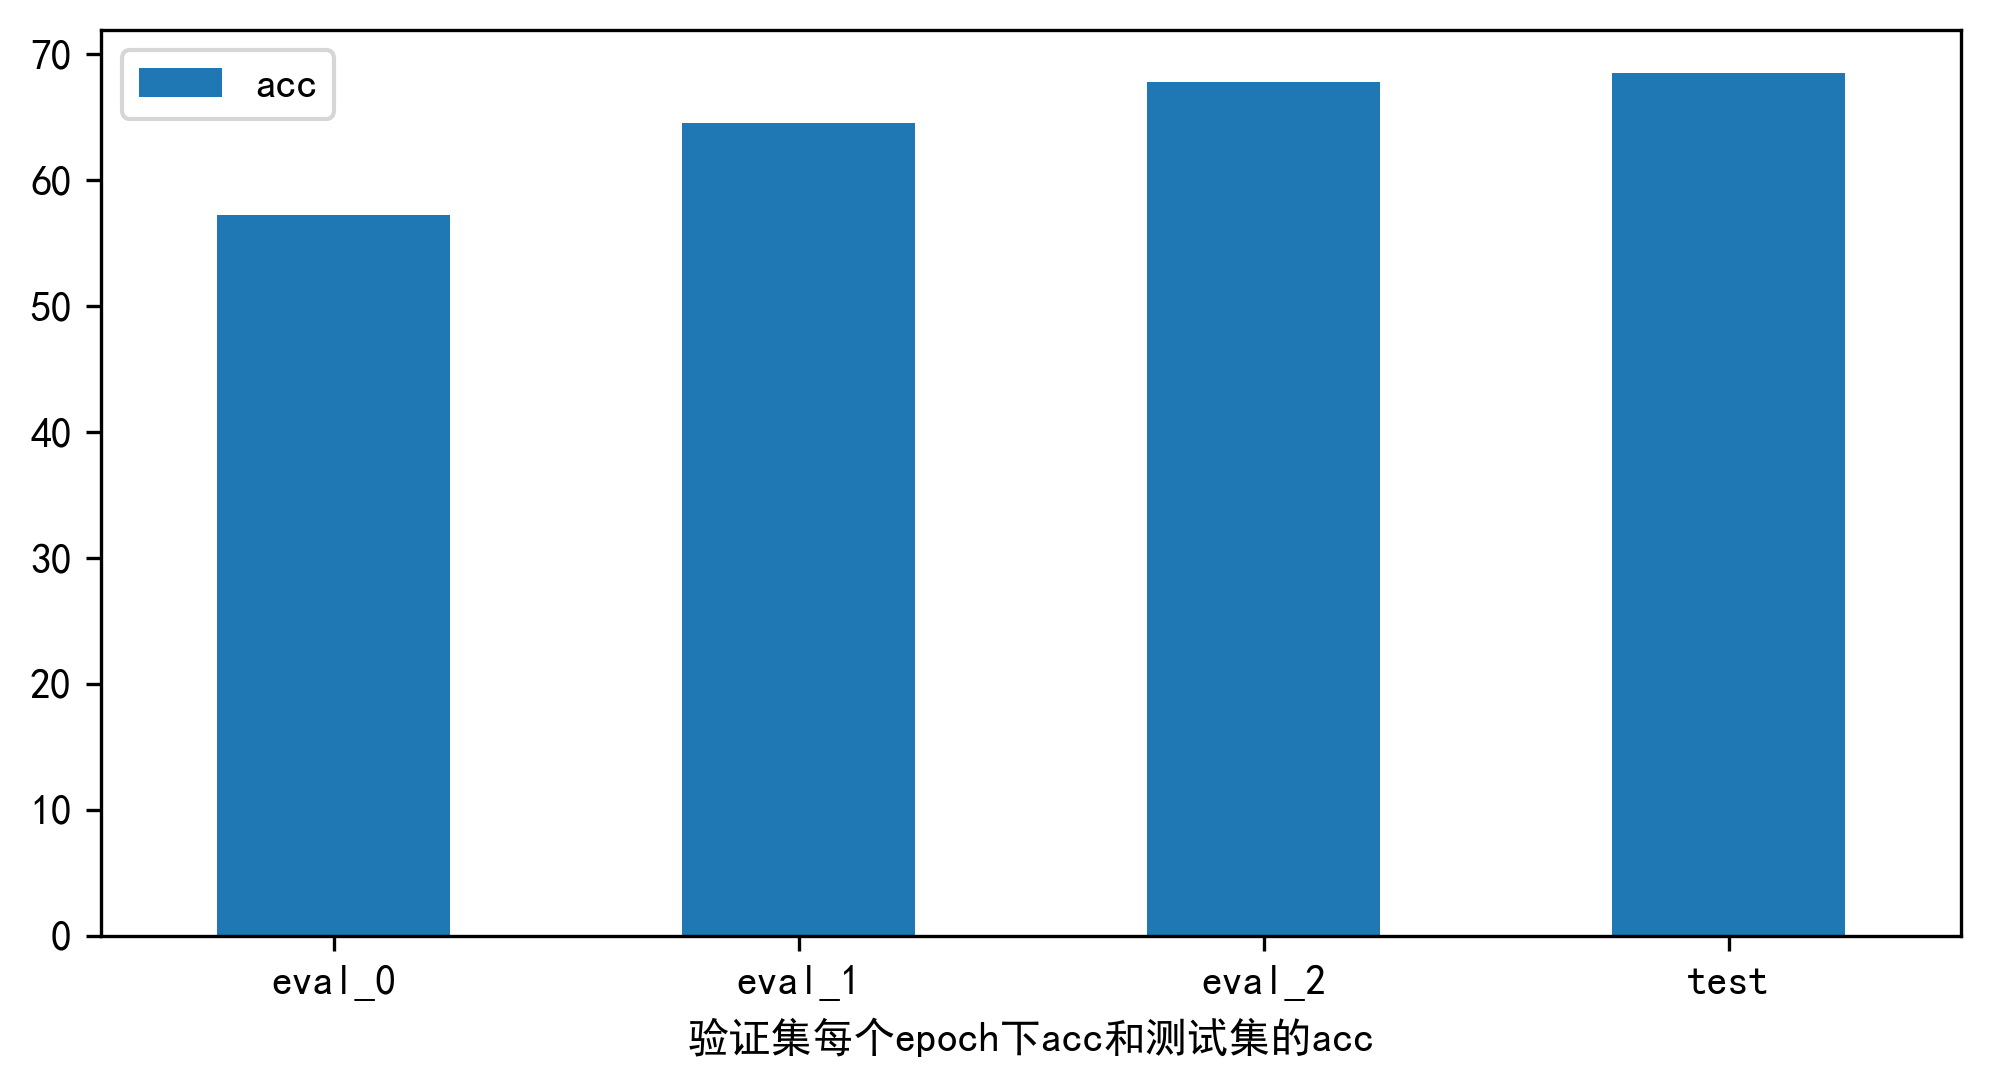

In [173]:
eval_test_acc_df = pd.DataFrame(acc,index,columns=['acc'])
eval_test_acc_df.index.name='验证集每个epoch下acc和测试集的acc'
eval_test_acc_df.plot(kind='bar',figsize=(8,4),rot=0)